In [1]:
## ViolentParsedFilt Data

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

file_path = '/Users/ashlyn/Desktop/DATA 6550/data/cox-violent-parsed_filt.csv'

ViolentParsedFilt = pd.read_csv(file_path)

ViolentParsedFilt.head()

### uploading the data

,id,name,first,last,sex,dob,age,age_cat,race,juv_fel_count,...,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,priors_count.1,event
0,1.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
1,2.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
2,3.0,michael ryan,michael,ryan,Male,06/02/1985,31,25 - 45,Caucasian,0,...,NaN,Risk of Recidivism,5,Medium,31/12/2014,Risk of Violence,2,Low,0,0
3,4.0,kevon dixon,kevon,dixon,Male,22/01/1982,34,25 - 45,African-American,0,...,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,27/01/2013,Risk of Violence,1,Low,0,1
4,5.0,ed philo,ed,philo,Male,14/05/1991,24,Less than 25,African-American,0,...,NaN,Risk of Recidivism,4,Low,14/04/2013,Risk of Violence,3,Low,4,0


In [2]:
## ViolentParsedFilt Data

print(ViolentParsedFilt.dtypes)

### showing data types

id                         float64
name                        object
first                       object
last                        object
sex                         object
dob                         object
age                          int64
age_cat                     object
race                        object
juv_fel_count                int64
decile_score                 int64
juv_misd_count               int64
juv_other_count              int64
priors_count                 int64
days_b_screening_arrest    float64
c_jail_in                   object
c_jail_out                  object
c_days_from_compas         float64
c_charge_degree             object
c_charge_desc               object
is_recid                     int64
r_charge_degree             object
r_days_from_arrest         float64
r_offense_date              object
r_charge_desc               object
r_jail_in                   object
violent_recid              float64
is_violent_recid             int64
vr_charge_degree    

In [3]:
## ViolentParsedFilt Data

ViolentParsedFilt['dob'] = pd.to_datetime(ViolentParsedFilt['dob'], errors='coerce')
ViolentParsedFilt['screening_date'] = pd.to_datetime(ViolentParsedFilt['screening_date'], errors='coerce')
ViolentParsedFilt['r_offense_date'] = pd.to_datetime(ViolentParsedFilt['r_offense_date'], errors='coerce')
ViolentParsedFilt['r_jail_in'] = pd.to_datetime(ViolentParsedFilt['r_jail_in'], errors='coerce')
ViolentParsedFilt['vr_offense_date'] = pd.to_datetime(ViolentParsedFilt['vr_offense_date'], errors='coerce')

### changing dates from object to datetime

In [4]:
## ViolentParsedFilt Data

ViolentParsedFilt.isnull().sum()

### checking for nulls
### quite a few, which to drop? 

id                          7315
name                           0
first                          0
last                           0
sex                            0
dob                            0
age                            0
age_cat                        0
race                           0
juv_fel_count                  0
decile_score                   0
juv_misd_count                 0
juv_other_count                0
priors_count                   0
days_b_screening_arrest     1297
c_jail_in                   1297
c_jail_out                  1297
c_days_from_compas           867
c_charge_degree              867
c_charge_desc                881
is_recid                       0
r_charge_degree             9899
r_days_from_arrest         11957
r_offense_date             14963
r_charge_desc              10039
r_jail_in                  11957
violent_recid              18316
is_violent_recid               0
vr_charge_degree           16977
vr_offense_date            17766
vr_charge_

In [5]:
## ViolentParsedFilt Data

ViolentParsedFilt['days_b_screening_arrest'].fillna(ViolentParsedFilt['days_b_screening_arrest'].median(), inplace=True)
ViolentParsedFilt['c_days_from_compas'].fillna(ViolentParsedFilt['c_days_from_compas'].median(), inplace=True)

### fill missing numerical columns with median

In [6]:
## ViolentParsedFilt Data

ViolentParsedFilt['c_jail_in'].fillna('Unknown', inplace=True)
ViolentParsedFilt['c_jail_out'].fillna('Unknown', inplace=True)
ViolentParsedFilt['r_jail_in'].fillna('Unknown', inplace=True)

### fill missing date-related columns with a placeholder 'Unknown'

In [7]:
## ViolentParsedFilt Data

ViolentParsedFilt['c_charge_degree'].fillna('Unknown', inplace=True)
ViolentParsedFilt['c_charge_desc'].fillna('Unknown', inplace=True)
ViolentParsedFilt['r_charge_degree'].fillna('Unknown', inplace=True)
ViolentParsedFilt['r_charge_desc'].fillna('Unknown', inplace=True)

### fill missing categorical columns with 'Unknown'

In [8]:
## ViolentParsedFilt Data

ViolentParsedFilt['score_text'].fillna('Unknown', inplace=True)
ViolentParsedFilt['v_score_text'].fillna('Unknown', inplace=True)
ViolentParsedFilt['vr_charge_desc'].fillna('Unknown', inplace=True)

### fill missing text columns with 'Unknown'

In [9]:
## ViolentParsedFilt Data

print(ViolentParsedFilt.isnull().sum())

### verify that missing values have been handled

id                          7315
name                           0
first                          0
last                           0
sex                            0
dob                            0
age                            0
age_cat                        0
race                           0
juv_fel_count                  0
decile_score                   0
juv_misd_count                 0
juv_other_count                0
priors_count                   0
days_b_screening_arrest        0
c_jail_in                      0
c_jail_out                     0
c_days_from_compas             0
c_charge_degree                0
c_charge_desc                  0
is_recid                       0
r_charge_degree                0
r_days_from_arrest         11957
r_offense_date             14963
r_charge_desc                  0
r_jail_in                      0
violent_recid              18316
is_violent_recid               0
vr_charge_degree           16977
vr_offense_date            17766
vr_charge_

In [10]:
## ViolentParsedFilt Data

felony_by_race_gender = ViolentParsedFilt.groupby(['race', 'sex'])['juv_fel_count'].sum().reset_index()

print(felony_by_race_gender)

### group by race and gender to summarize the juvenile felony count

                race     sex  juv_fel_count
0   African-American  Female             54
1   African-American    Male           1067
2              Asian  Female              0
3              Asian    Male              0
4          Caucasian  Female              3
5          Caucasian    Male            171
6           Hispanic  Female              2
7           Hispanic    Male             67
8    Native American  Female              0
9    Native American    Male             14
10             Other  Female              2
11             Other    Male             28


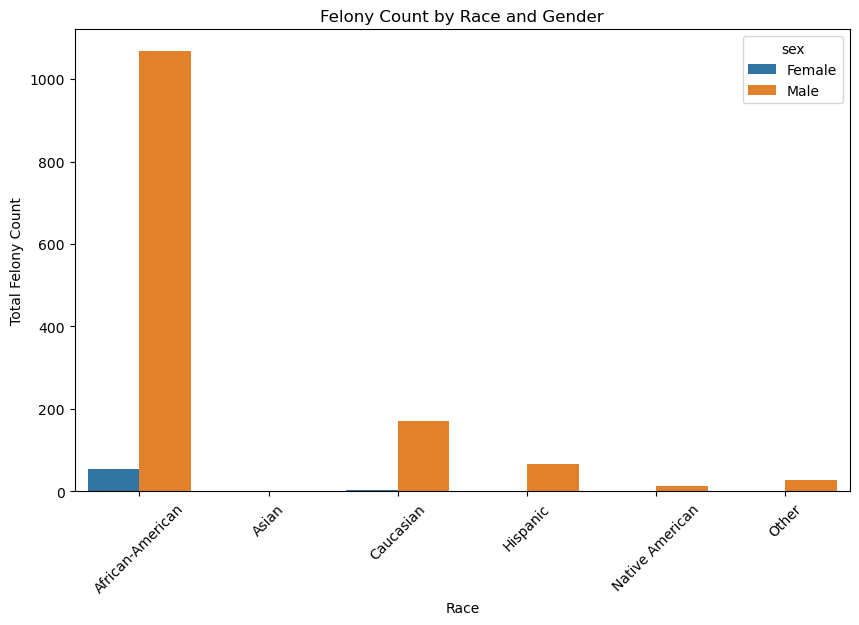

In [53]:
## ViolentParsedFilt Data 

felony_by_race_gender = ViolentParsedFilt.groupby(['race', 'sex'])['juv_fel_count'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='race', y='juv_fel_count', hue='sex', data=felony_by_race_gender)
plt.title('Felony Count by Race and Gender')
plt.xlabel('Race')
plt.ylabel('Total Felony Count')
plt.xticks(rotation=45) 
plt.show()                                                    

### bar plot to visualize felony count by race and gender

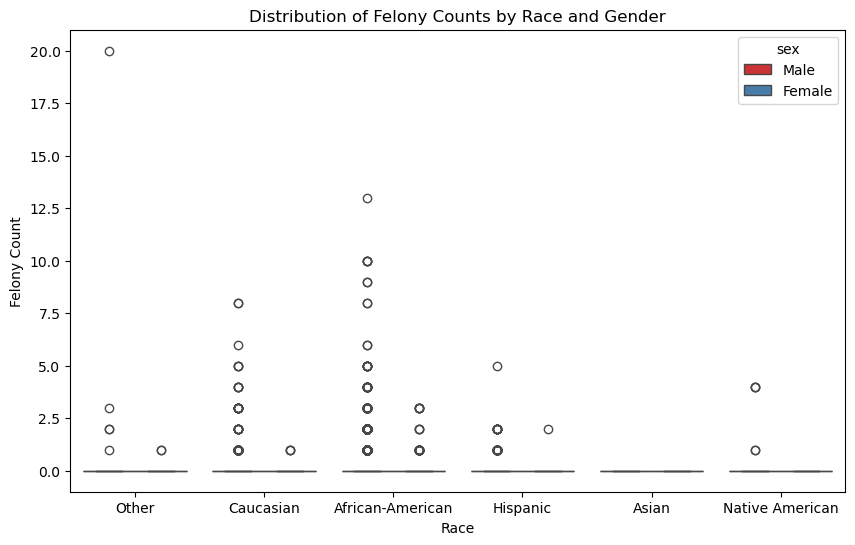

In [55]:
## ViolentParsedFilt Data 

plt.figure(figsize=(10, 6))
sns.boxplot(x='race', y='juv_fel_count', hue='sex', data=ViolentParsedFilt, palette='Set1')  # You can use a different palette if you prefer
plt.title('Distribution of Felony Counts by Race and Gender')
plt.xlabel('Race')
plt.ylabel('Felony Count')
plt.show()


### boxplot for felony counts by race and gender

In [27]:
## ViolentParsedFilt Data 

top_10_felony_by_race_gender = felony_by_race_gender.sort_values(by='juv_fel_count', ascending=False).head(10)
print(top_10_felony_by_race_gender)

### sorting the top 10 felonies by race 

                race     sex  juv_fel_count
1   African-American    Male           1067
5          Caucasian    Male            171
7           Hispanic    Male             67
0   African-American  Female             54
11             Other    Male             28
9    Native American    Male             14
4          Caucasian  Female              3
6           Hispanic  Female              2
10             Other  Female              2
2              Asian  Female              0


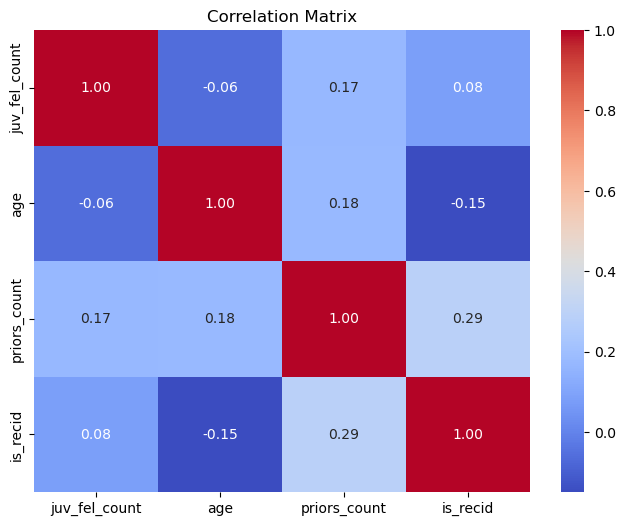

In [29]:
## ViolentParsedFilt Data 

correlation_matrix = ViolentParsedFilt[['juv_fel_count', 'age', 'priors_count', 'is_recid']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### correlation matrix to find correlations between numerical columns

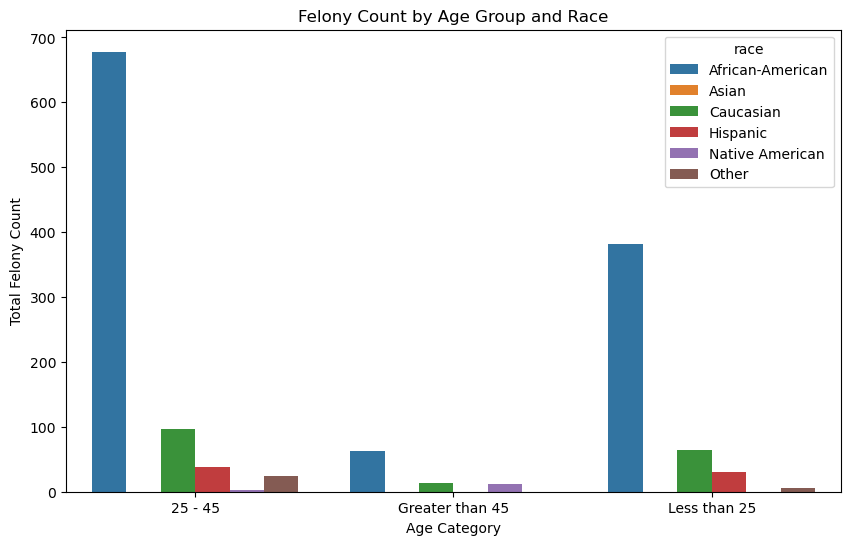

In [31]:
## ViolentParsedFilt Data 

felony_by_age_category = ViolentParsedFilt.groupby(['age_cat', 'race'])['juv_fel_count'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='age_cat', y='juv_fel_count', hue='race', data=felony_by_age_category)
plt.title('Felony Count by Age Group and Race')
plt.xlabel('Age Category')
plt.ylabel('Total Felony Count')
plt.show()

### group by age category and race, sum the juvenile felony counts
### plotting the felony counts by age group

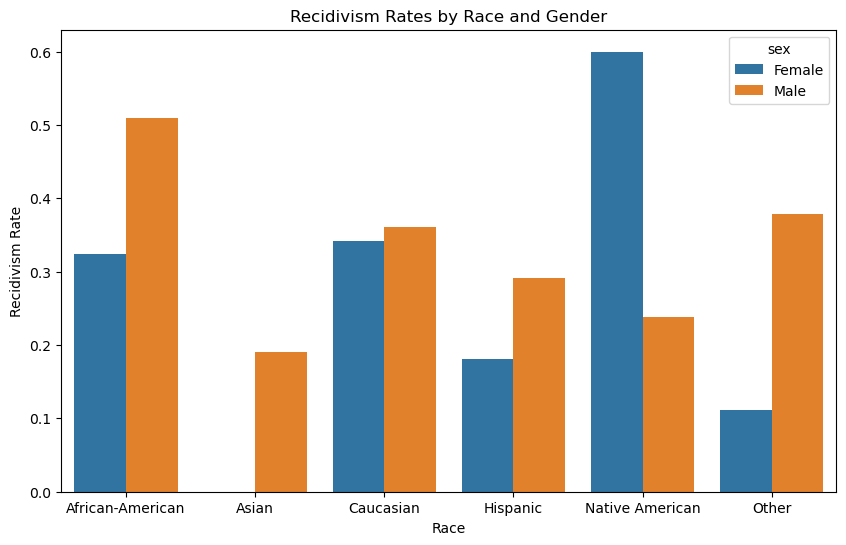

In [33]:
## ViolentParsedFilt Data 

recidivism_by_race_gender = ViolentParsedFilt.groupby(['race', 'sex'])['is_recid'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='race', y='is_recid', hue='sex', data=recidivism_by_race_gender)
plt.title('Recidivism Rates by Race and Gender')
plt.xlabel('Race')
plt.ylabel('Recidivism Rate')
plt.show()

### group by race and sex to calculate recidivism rates
### plot recidivism rates by race and gender

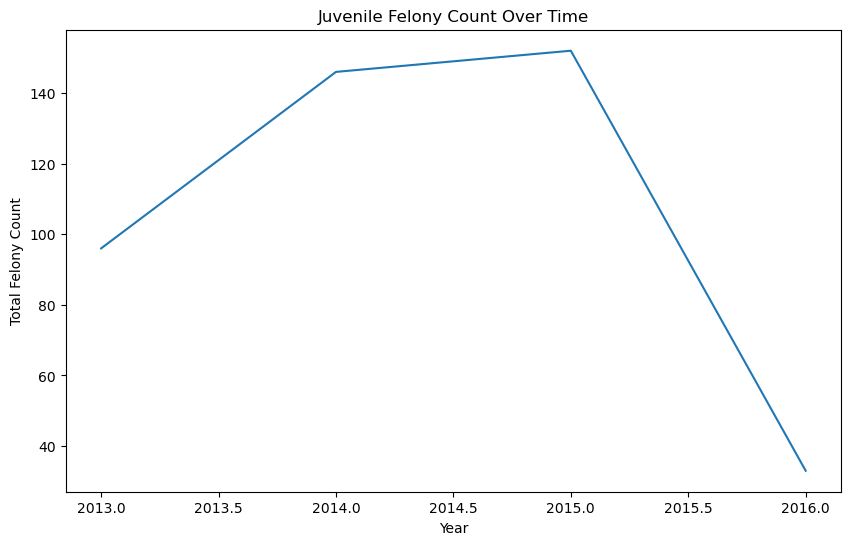

In [37]:
## ViolentParsedFilt Data 

ViolentParsedFilt['r_offense_year'] = ViolentParsedFilt['r_offense_date'].dt.year
felony_by_year = ViolentParsedFilt.groupby('r_offense_year')['juv_fel_count'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='r_offense_year', y='juv_fel_count', data=felony_by_year)
plt.title('Juvenile Felony Count Over Time')
plt.xlabel('Year')
plt.ylabel('Total Felony Count')
plt.show()

### extract year from offense date and group by it to analyze trends over time
### plot felony counts over time